In [1]:
%matplotlib inline

import os
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

In [2]:
orgs = pd.read_csv('csv_export/organizations.csv', low_memory=False)
print(len(orgs))
print(list(orgs.columns.values))

482511
['company_name', 'primary_role', 'domain', 'homepage_url', 'country_code', 'state_code', 'region', 'city', 'zipcode', 'address', 'status', 'short_description', 'category_list', 'category_group_list', 'funding_rounds', 'funding_total_usd', 'founded_on', 'first_funding_on', 'last_funding_on', 'closed_on', 'employee_count', 'email', 'phone', 'facebook_url', 'linkedin_url', 'cb_url', 'logo_url', 'profile_image_url', 'twitter_url', 'uuid', 'created_at', 'updated_at']


In [3]:
org_types = orgs['primary_role'].value_counts()
print(org_types)

company     437888
investor     23994
school       14351
group         6260
Investor        13
Name: primary_role, dtype: int64


In [4]:
comps = orgs.loc[orgs['primary_role'] == 'company']
print (len(comps))
invs = orgs.loc[(orgs['primary_role'] == 'investor') | (orgs['primary_role'] == 'Investor')]
print (len(invs))

437888
24007


In [5]:
comps_labeled = comps[pd.notnull(comps['category_group_list']) | pd.notnull(comps['category_list'])]
print (comps_labeled.head(n=10))

                company_name primary_role             domain  \
0                    MindHub      company       mind-hub.com   
1                      Intel      company          intel.com   
2                  Intercomp      company                NaN   
3                     Mitrol      company         mitrol.net   
4                  Microsoft      company      microsoft.com   
6   Toyota Motor Corporation      company  toyota-global.com   
7                       Ikro      company        ikro.com.br   
8            Electronic Arts      company             ea.com   
10         Laboratórios Noli      company                NaN   
11         Linear Technology      company         linear.com   

                    homepage_url country_code state_code        region  \
0        http://www.mind-hub.com          MEX        NaN       Tijuana   
1          http://www.intel.com/          USA         CA   SF Bay Area   
2                            NaN          NaN        NaN           NaN   

In [51]:
comps_final = comps_labeled.drop('primary_role', 1)
comps_final = comps_final.drop('domain', 1)
comps_final = comps_final.drop('homepage_url', 1)
comps_final = comps_final.drop('country_code', 1)
comps_final = comps_final.drop('state_code', 1)
comps_final = comps_final.drop('region', 1)
comps_final = comps_final.drop('city', 1)
comps_final = comps_final.drop('zipcode', 1)
comps_final = comps_final.drop('address', 1)
comps_final = comps_final.drop('short_description', 1)
comps_final = comps_final.drop('founded_on', 1)
comps_final = comps_final.drop('first_funding_on', 1)
comps_final = comps_final.drop('last_funding_on', 1)
comps_final = comps_final.drop('closed_on', 1)
comps_final = comps_final.drop('employee_count', 1)
comps_final = comps_final.drop('email', 1)
comps_final = comps_final.drop('phone', 1)
comps_final = comps_final.drop('facebook_url', 1)
comps_final = comps_final.drop('linkedin_url', 1)
comps_final = comps_final.drop('cb_url', 1)
comps_final = comps_final.drop('logo_url', 1)
comps_final = comps_final.drop('profile_image_url', 1)
comps_final = comps_final.drop('twitter_url', 1)
comps_final = comps_final.drop('created_at', 1)
comps_final = comps_final.drop('updated_at', 1)
print(comps_final.head(n=5))
print(len(comps_final))

  company_name     status                                      category_list  \
0      MindHub  operating                                automotive|software   
1        Intel        ipo      hardware|manufacturing|semiconductor|software   
2    Intercomp  operating                                  hardware|software   
3       Mitrol  operating                                      manufacturing   
4    Microsoft        ipo  cloud computing|developer tools|operating syst...   

                                 category_group_list  funding_rounds  \
0                            software|transportation               1   
1  hardware|manufacturing|science and engineering...               1   
2                                  hardware|software               1   
3                                      manufacturing               1   
4               internet services|platforms|software               1   

   funding_total_usd                                  uuid  
0                NaN  32f

In [72]:
out = open('comps_selectedlabels.csv', 'w')
out.write('entity_uuid\tcompany_name\tmarketspace\n')
for index in range(0, len(comps_final)):
    line_out = comps_final.iloc[index]['uuid'] + '\t' + comps_final.iloc[index]['company_name']
    
    category_group_list = str(comps_final.iloc[index]['category_group_list'])
    category_list = str(comps_final.iloc[index]['category_list'])
    
    if (category_group_list == 'NaN'):
        categories = category_list
    elif (category_list == 'NaN'):
        categories = category_group_list
    else:
        categories = category_list + '|' + category_group_list
    categories = categories.replace('hardware|', '')
    categories = categories.replace('hardware', '')
    categories = categories.replace('|hardware', '')
    categories = categories.replace('software|', '')
    categories = categories.replace('software', '')
    categories = categories.replace('|software', '')
    if (len(categories) == 0):
        line_out = line_out + '\t\n'
    else:
        marketspace = categories[:categories.find('|')]
        line_out = line_out + '\t' + marketspace + '\n'
    out.write(line_out)
out.close()

In [74]:
comps_selectedlabels = pd.read_csv('comps_selectedlabels.csv', sep='\t')
print (comps_selectedlabels.head(n=5))

                            entity_uuid company_name      marketspace
0  32f99e59-c592-250e-c2b5-98467b46e9ff      MindHub       automotive
1  1e4f199c-363b-451b-a164-f94571075ee5        Intel    manufacturing
2  6681b1b0-0cea-6a4a-820d-60b15793fa66    Intercomp              NaN
3  9c429e96-79a0-c199-f394-678a1deba82f       Mitrol    manufacturing
4  fd80725f-53fc-7009-9878-aeecf1e9ffbb    Microsoft  cloud computing


In [75]:
comps_final2 = comps_selectedlabels[pd.notnull(comps_selectedlabels['marketspace'])]
print (comps_final2.head(n=10))
print (len(comps_final2))

                             entity_uuid              company_name  \
0   32f99e59-c592-250e-c2b5-98467b46e9ff                   MindHub   
1   1e4f199c-363b-451b-a164-f94571075ee5                     Intel   
3   9c429e96-79a0-c199-f394-678a1deba82f                    Mitrol   
4   fd80725f-53fc-7009-9878-aeecf1e9ffbb                 Microsoft   
5   12b90373-ab49-a56a-4b4e-c7b3e9236faf  Toyota Motor Corporation   
6   322eee3f-a036-651f-5754-0f8759374699                      Ikro   
7   5a6207e2-b868-9f41-5178-8d51d2c40a93           Electronic Arts   
8   e378c0e6-278b-6243-6776-c61fdbcdc004         Laboratórios Noli   
9   27bb6fe7-0a5d-01c6-30af-55bd8e94c8e6         Linear Technology   
10  66d6d19a-4852-0c21-0098-4080cb90d2ac                   Knoware   

        marketspace  
0        automotive  
1     manufacturing  
3     manufacturing  
4   cloud computing  
5        automotive  
6        automotive  
7          computer  
8           medical  
9     manufacturing  
10  educa

In [79]:
funding_rounds = pd.read_csv('csv_export/funding_rounds.csv')
print (funding_rounds.head(n=5))

                company_name country_code state_code   region     city  \
0          Undercover Colors          USA         NC  Raleigh  Raleigh   
1                Agency Core          GBR        NaN   London   London   
2                     Algama          FRA        NaN    Paris    Paris   
3                     Bayzat          ARE        NaN    Dubai    Dubai   
4  Blackmoon Financial Group          RUS        NaN   Moscow   Moscow   

                               company_category_list funding_round_type  \
0                Fashion|Lifestyle|Social Innovation            venture   
1    Business Intelligence|Cloud Computing|Real Time            venture   
2  Biotechnology|Food and Beverage|Food Processin...            venture   
3  Banking|Employee Benefits|Insurance|Price Comp...            venture   
4                                            FinTech            venture   

  funding_round_code announced_on  raised_amount_usd  \
0                NaN   2016-11-11     5500000.00

In [77]:
funds = pd.read_csv('csv_export/funds.csv')
funds = funds.drop('started_on', 1)
funds = funds.drop('announced_on', 1)
funds = funds.drop('created_at', 1)
funds = funds.drop('updated_at', 1)

funds = funds[pd.notnull(funds['raised_amount'])]
print (funds.head(n=5))
print (len(funds))

                            entity_uuid                             fund_uuid  \
2  b51ff078-c9d9-9f51-681d-4f9ac888e070  35a6f12f-e3ad-1d64-7ac9-a5195ff96d43   
3  2ba8d099-c8aa-a375-8d6e-aa01968a6934  96235d28-76a4-97f7-1a56-2f0437290494   
4  0322e144-4f6e-5a56-6d4f-5a74cd9a7397  46f8f44e-92ba-06c6-d5dd-430966995221   
5  56e40f50-97c7-2a77-255d-1d97d5f30646  0d6eeb32-ebbf-09c5-61f8-2db8f44bcfac   
6  4fd5619b-da62-ab8d-281f-1aaa9a7c93d0  ea34eeac-a4b7-56e7-0e77-24666e66eb36   

                               fund_name  raised_amount  \
2                   2007 "Consumer" Fund      300000000   
3                    2010 Jumpstart Fund         120000   
4  32 Degrees Diversified Energy Fund II       84600000   
5                     500 Startups III-A       26867000   
6                  $550M HealthCare Fund      550000000   

  raised_amount_currency_code  
2                         USD  
3                         USD  
4                         USD  
5                         USD 

In [78]:
mf = nx.DiGraph()
#for index in range(0, len(funds)):
for index in range(0, 100):
    node_from = funds.iloc[index]['fund_name']
    node_to = funds.iloc[index]['entity_uuid']
    edge_weight = funds.iloc[index]['raised_amount']
    mf.add_weighted_edges_from([(node_from, node_to, edge_weight)])

# add category labels
for node in mf.nodes():
    print (node)

Altus Capital Partners II
Abingworth Bioventures VI
2010 Jumpstart Fund
Accel XI
Artiman Ventures III
6492c71a-1216-c6fc-8d59-9d0b8dc3051a
AG Energy Partners LP.
a2ff789c-af97-0574-bbe6-f707c5766651
387bd749-10f5-65c8-a709-8d22766e9066
Arborview Capital Partners LP
807a98f4-8779-739b-426c-75017cdbe821
Atlantic Bridge II
AlAdInn Ventures
c4f13006-78c4-7cd9-b010-62a6863290f0
Australian private equity VI fund
Alterna Core Capital Assets Fund II
Accelerator Fund
ACG Fund II
5b78f7ad-93a6-250d-361d-5b8624a2e848
Accelerace Invest
616f27aa-1250-b0b6-ca70-9e7121cfd57d
Azini 3
Aster II
3f2ccf99-71dd-02cd-2c21-fdc4cc3b3ca7
Arcus Ventures Fund I LP
aa978289-a0e0-8e2d-9db1-537203f28e62
a764fc5b-fc26-ac6c-d14d-632d9124c8b6
b603a4a8-a7e7-89b3-a1bb-d2c134abab5c
Accel London IV
58b62e32-dc64-49e5-ff38-1fd7ad67bc3e
Artiman Ventures Fund II
5AM Ventures IV, L.P.
Angel CoFund
45a90b77-9e8f-e5ea-e508-2068c72e90e3
5cacb20c-6485-89f4-b78b-81a7d3afb0f6
Allos II
Annex Fund I
f9100321-7ef8-12b5-2a4f-9f885084b0

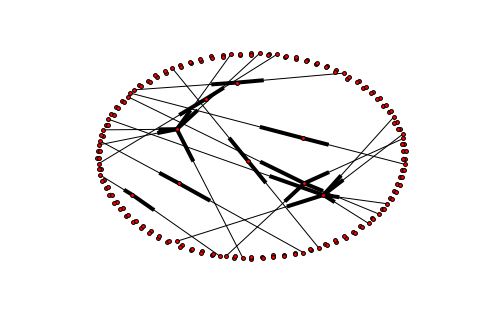

In [41]:
nx.draw(mf, node_size=15)